In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_excel("Tokens Paid.xlsx")
df.isnull().sum()
df.info()
df.describe()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              267 non-null    object        
 1   Lead ID           121 non-null    object        
 2   created_date      266 non-null    datetime64[ns]
 3   paid_date         267 non-null    datetime64[ns]
 4   cohort            267 non-null    object        
 5   source            262 non-null    object        
 6   agent             267 non-null    object        
 7   counsellor        265 non-null    object        
 8   prospect_id       265 non-null    object        
 9   upload_timestamp  0 non-null      float64       
 10  status            241 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 23.1+ KB


In [52]:
g=pd.read_excel("Tokens Paid.xlsx")
h=pd.read_excel("Cl_Leads1.xlsx")
i=pd.merge(g,h,left_on="Lead ID",right_on="lead_id",how="inner")
k=pd.read_csv("Phone_Cleaned.csv")
l=pd.merge(i,k,left_on="Lead ID",right_on="Lead Id",how="inner")
l.to_csv("lead_more detailed.csv",index=False)


In [53]:
distinct_lead_ids_count = i['Lead ID'].nunique()
print(distinct_lead_ids_count)
print(i)

121
         Name                                 Lead ID created_date  paid_date  \
0       Srija                      l:1501566724035844   2024-04-13 2024-05-02   
1      Satyam  d552642c-6784-4d5d-a545-0e926458e848-3   2024-03-18 2024-03-19   
2       Tanya                       l:900041774843171   2023-11-30 2023-12-12   
3      Ashish                      l:1293647514650937   2023-12-06 2023-12-13   
4    Satheesh                      l:1519452715578667   2024-02-18 2024-03-15   
..        ...                                     ...          ...        ...   
116     Ashok                      l:1441157749822520   2024-04-10 2024-04-15   
117   Plabini                       l:733737222271914   2024-04-09 2024-04-14   
118    Pranav                       l:861701659054416   2024-03-30 2024-04-14   
119     Gokul                      l:1547362259166875   2024-04-04 2024-04-14   
120  Shrishti                      l:1347108042669193   2024-04-08 2024-04-15   

       cohort        so

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\3363502965.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cohorts, x='cohort', y='avg_date_difference', palette='viridis')


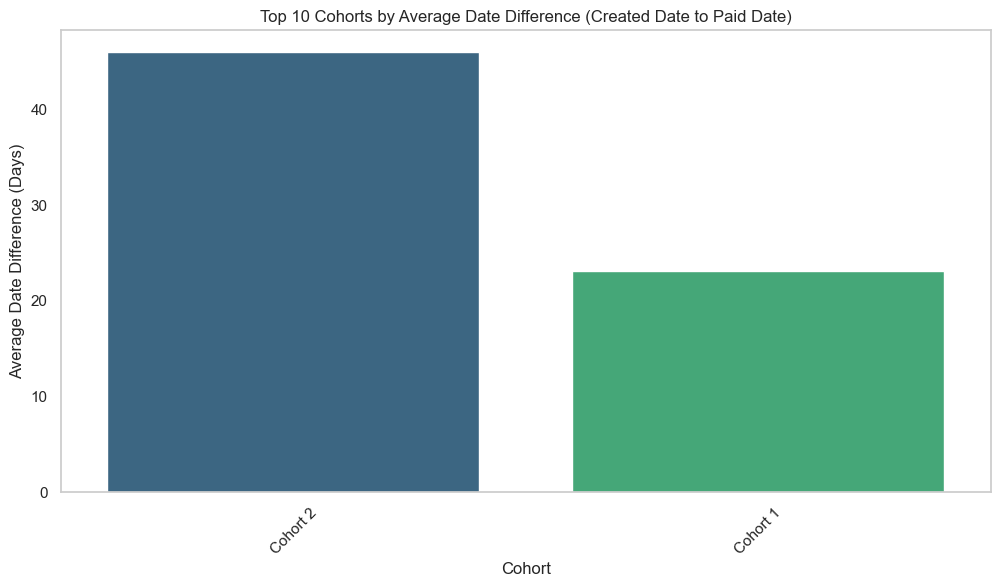

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\3363502965.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_agents, x='agent', y='avg_date_difference', palette='viridis')


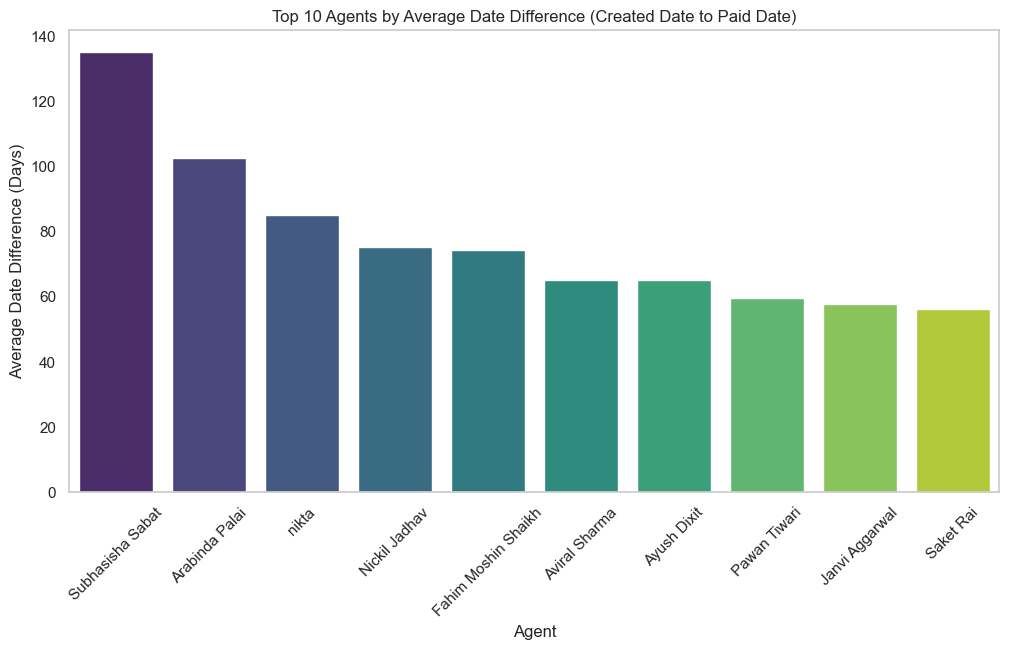

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\3363502965.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_counsellors, x='counsellor', y='avg_date_difference', palette='viridis')


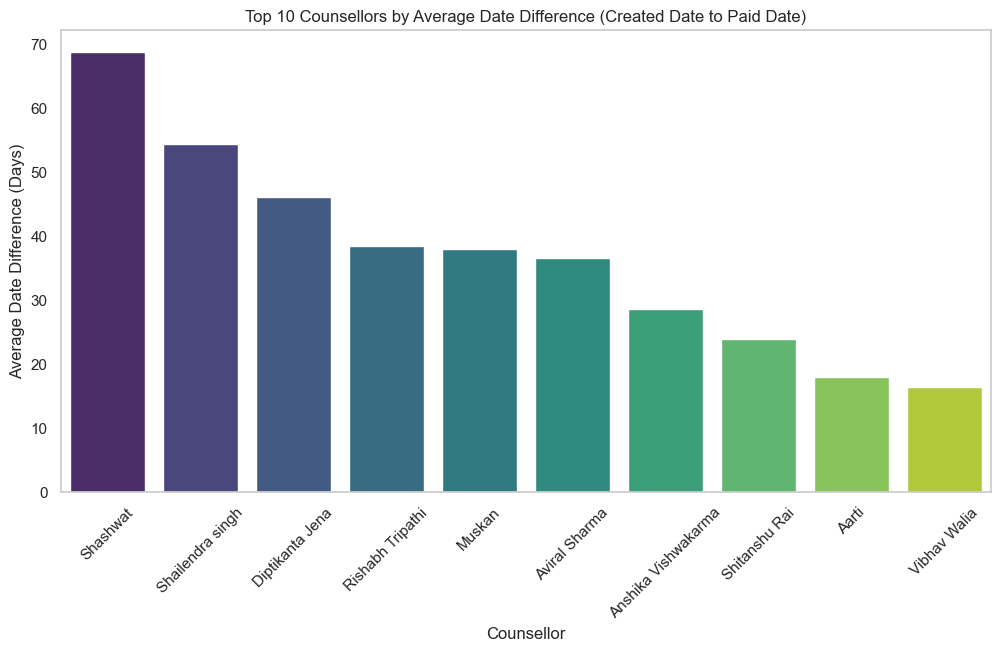

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_excel("Tokens Paid.xlsx")

df['date_difference'] = (df['paid_date'] - df['created_date']).dt.days

cohort_analysis = df.groupby(['cohort']).agg(avg_date_difference=('date_difference', 'mean')).reset_index()
agent_analysis = df.groupby(['agent']).agg(avg_date_difference=('date_difference', 'mean')).reset_index()
counsellor_analysis = df.groupby(['counsellor']).agg(avg_date_difference=('date_difference', 'mean')).reset_index()

top_10_cohorts = cohort_analysis.nlargest(10, 'avg_date_difference')
top_10_agents = agent_analysis.nlargest(10, 'avg_date_difference')
top_10_counsellors = counsellor_analysis.nlargest(10, 'avg_date_difference')

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cohorts, x='cohort', y='avg_date_difference', palette='viridis')
plt.title('Top 10 Cohorts by Average Date Difference (Created Date to Paid Date)')
plt.xlabel('Cohort')
plt.ylabel('Average Date Difference (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_agents, x='agent', y='avg_date_difference', palette='viridis')
plt.title('Top 10 Agents by Average Date Difference (Created Date to Paid Date)')
plt.xlabel('Agent')
plt.ylabel('Average Date Difference (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_counsellors, x='counsellor', y='avg_date_difference', palette='viridis')
plt.title('Top 10 Counsellors by Average Date Difference (Created Date to Paid Date)')
plt.xlabel('Counsellor')
plt.ylabel('Average Date Difference (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


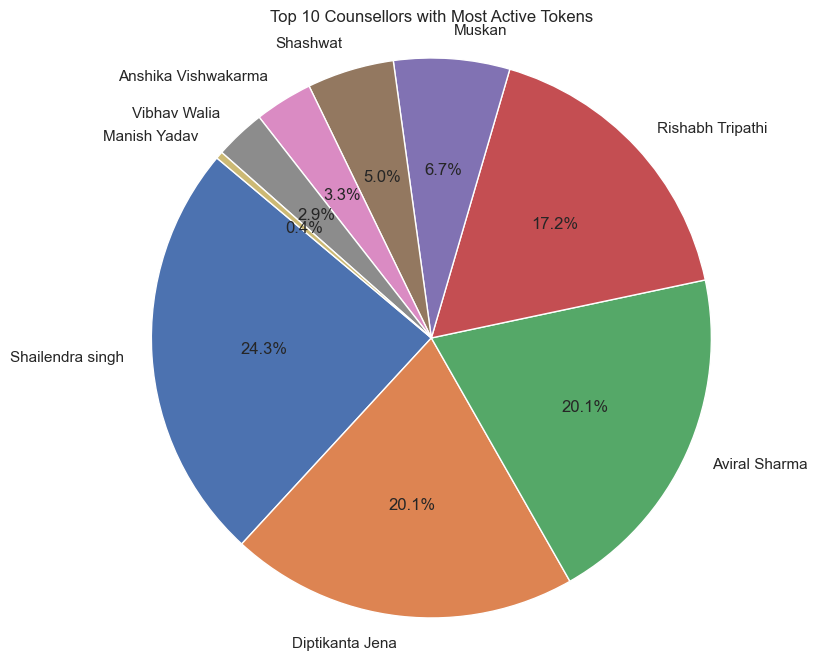

In [55]:
import pandas as pd
import matplotlib.pyplot as plt



active_tokens_per_counsellor = df[df['status'] == 'ACTIVE TOKEN'].groupby('counsellor').size().reset_index(name='active_tokens')

top_10_counsellors = active_tokens_per_counsellor.nlargest(10, 'active_tokens')

plt.figure(figsize=(10, 8))
plt.pie(top_10_counsellors['active_tokens'], labels=top_10_counsellors['counsellor'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Counsellors with Most Active Tokens')
plt.axis('equal') 
plt.show()


In [56]:
i.to_csv("Detail_Tokens.csv",index=False)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_counsellors_per_degree = counsellor_performance.groupby('graduation_degree').apply(lambda x: x.nlargest(5, 'active_token_count')).reset_index(drop=True)
C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


<Figure size 1400x800 with 0 Axes>

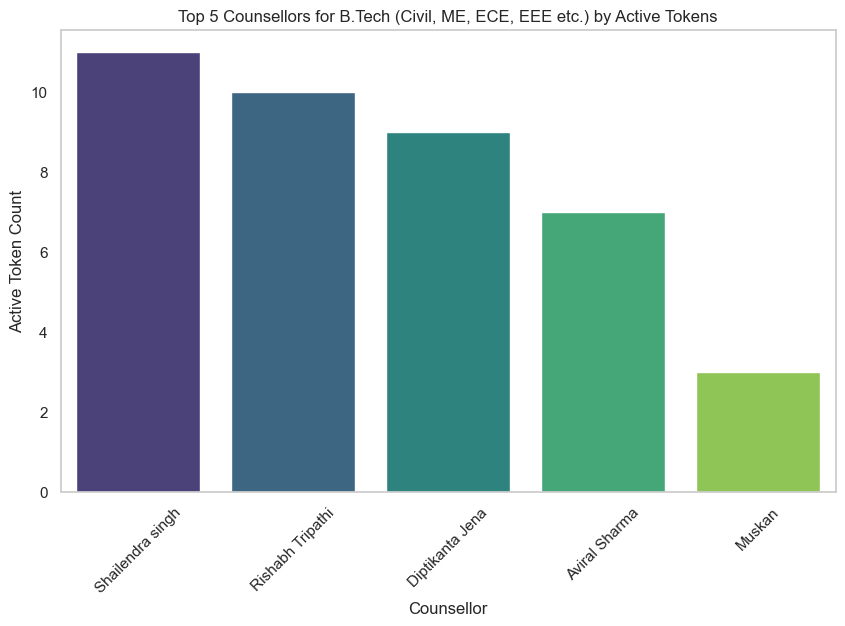

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


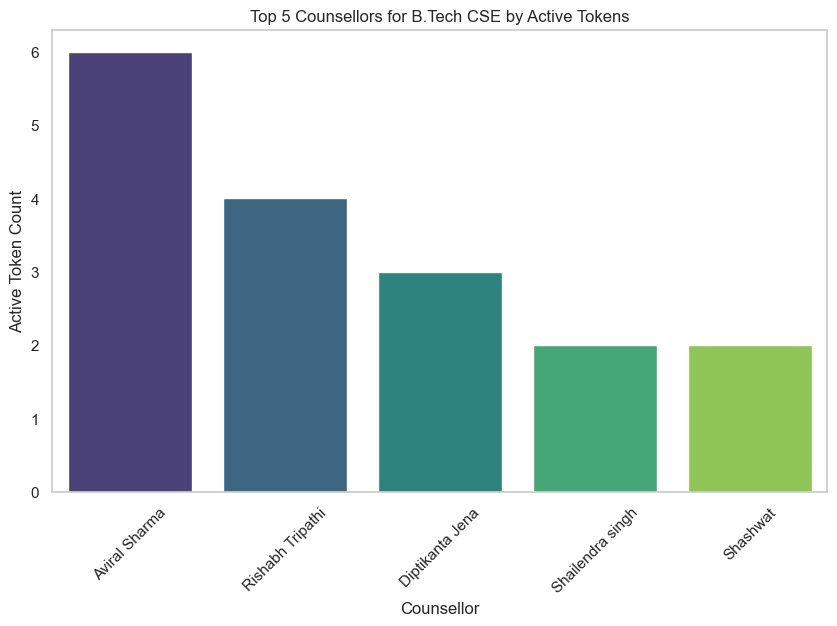

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


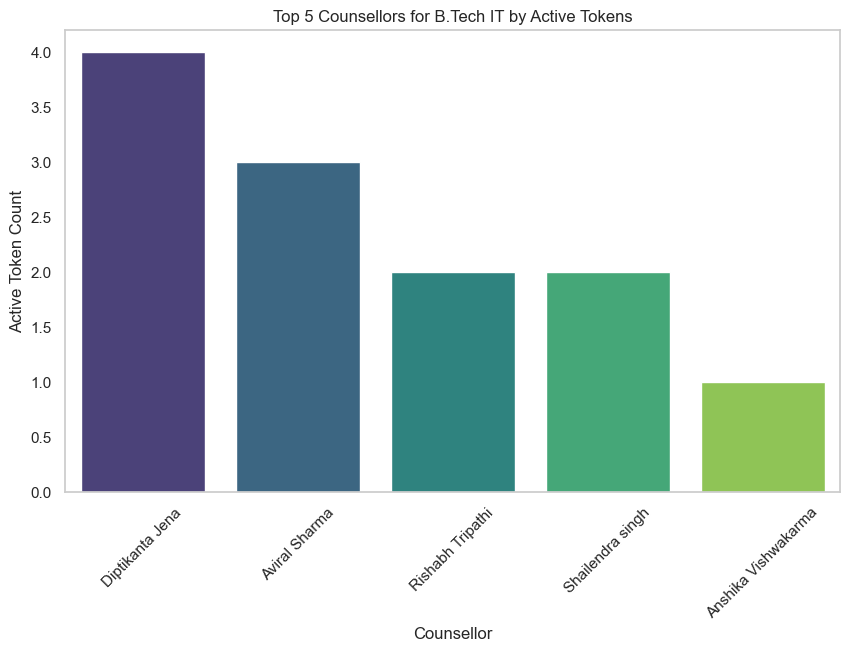

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


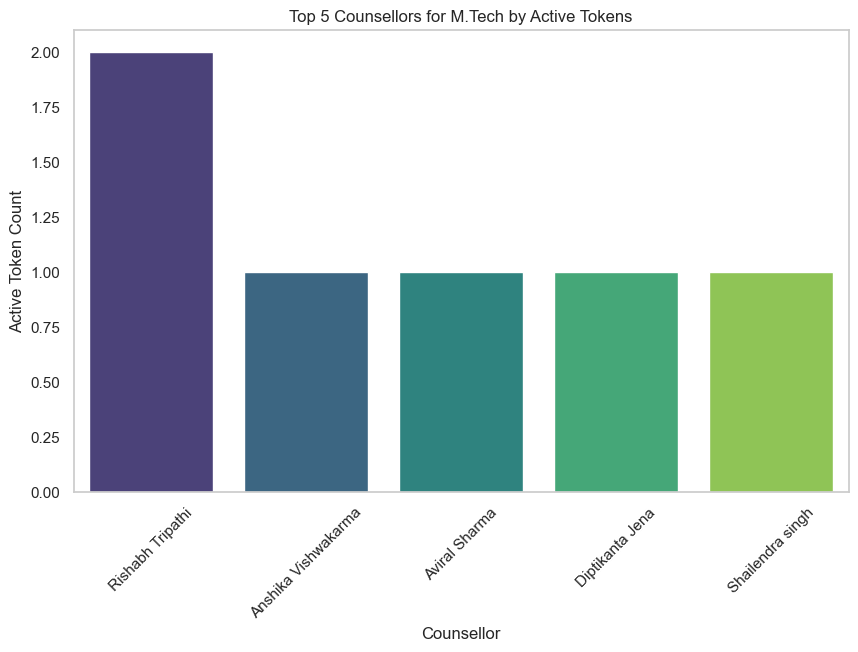

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


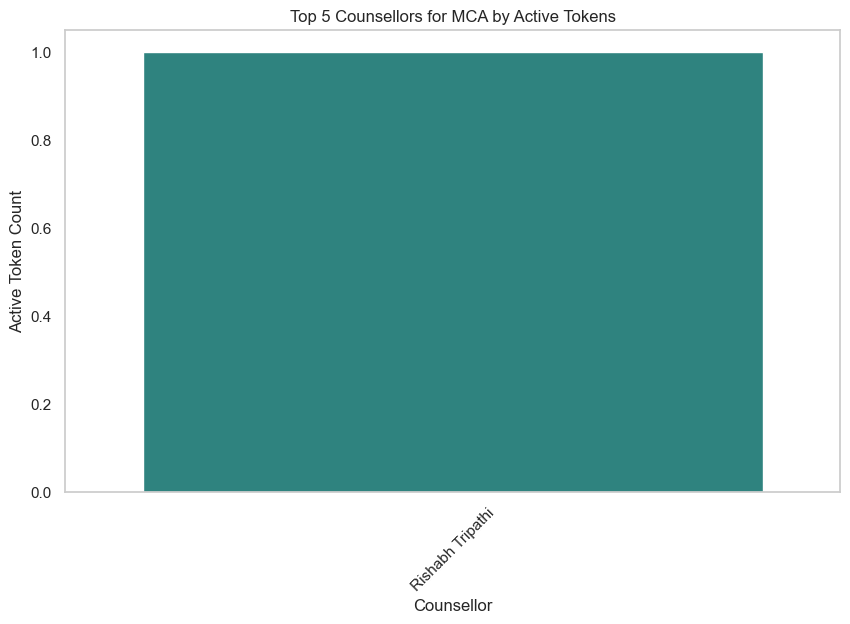

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


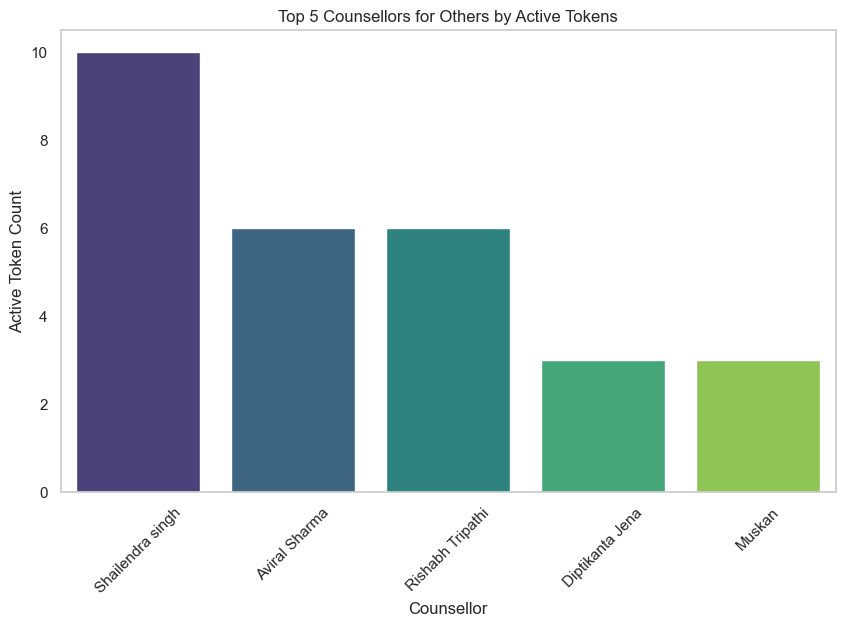

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


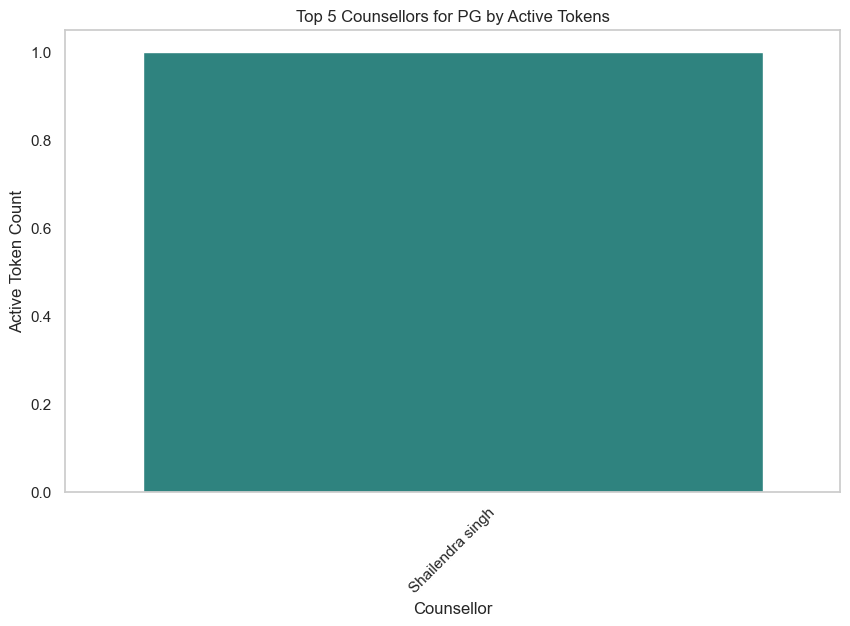

C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\1566499204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')


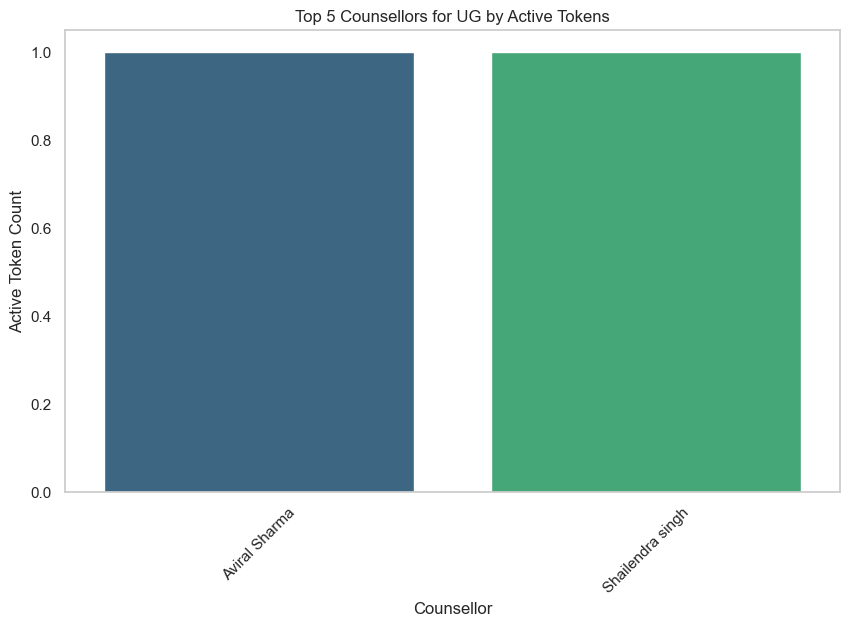

                    graduation_degree           counsellor  active_token_count
0   B.Tech (Civil, ME, ECE, EEE etc.)     Shailendra singh                  11
1   B.Tech (Civil, ME, ECE, EEE etc.)     Rishabh Tripathi                  10
2   B.Tech (Civil, ME, ECE, EEE etc.)      Diptikanta Jena                   9
3   B.Tech (Civil, ME, ECE, EEE etc.)        Aviral Sharma                   7
4   B.Tech (Civil, ME, ECE, EEE etc.)               Muskan                   3
5                          B.Tech CSE        Aviral Sharma                   6
6                          B.Tech CSE     Rishabh Tripathi                   4
7                          B.Tech CSE      Diptikanta Jena                   3
8                          B.Tech CSE     Shailendra singh                   2
9                          B.Tech CSE             Shashwat                   2
10                          B.Tech IT      Diptikanta Jena                   4
11                          B.Tech IT        Aviral 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Detail_Tokens.csv")

df['created_date'] = pd.to_datetime(df['created_date'])
df['paid_date'] = pd.to_datetime(df['paid_date'])

active_tokens_df = df[df['status'] == 'ACTIVE TOKEN']

counsellor_performance = active_tokens_df.groupby(['graduation_degree', 'counsellor']).size().reset_index(name='active_token_count')

top_5_counsellors_per_degree = counsellor_performance.groupby('graduation_degree').apply(lambda x: x.nlargest(5, 'active_token_count')).reset_index(drop=True)

plt.figure(figsize=(14, 8))

for graduation_degree in top_5_counsellors_per_degree['graduation_degree'].unique():
    degree_df = top_5_counsellors_per_degree[top_5_counsellors_per_degree['graduation_degree'] == graduation_degree]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=degree_df, x='counsellor', y='active_token_count', palette='viridis')
    plt.title(f'Top 5 Counsellors for {graduation_degree} by Active Tokens')
    plt.xlabel('Counsellor')
    plt.ylabel('Active Token Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

print(top_5_counsellors_per_degree)


C:\Users\sudhe\AppData\Local\Temp\ipykernel_6788\3333844388.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_counsellors_per_degree = merged_df.groupby('graduation_degree').apply(lambda x: x.nlargest(5, 'leads_count')).reset_index(drop=True)


<Figure size 1400x800 with 0 Axes>

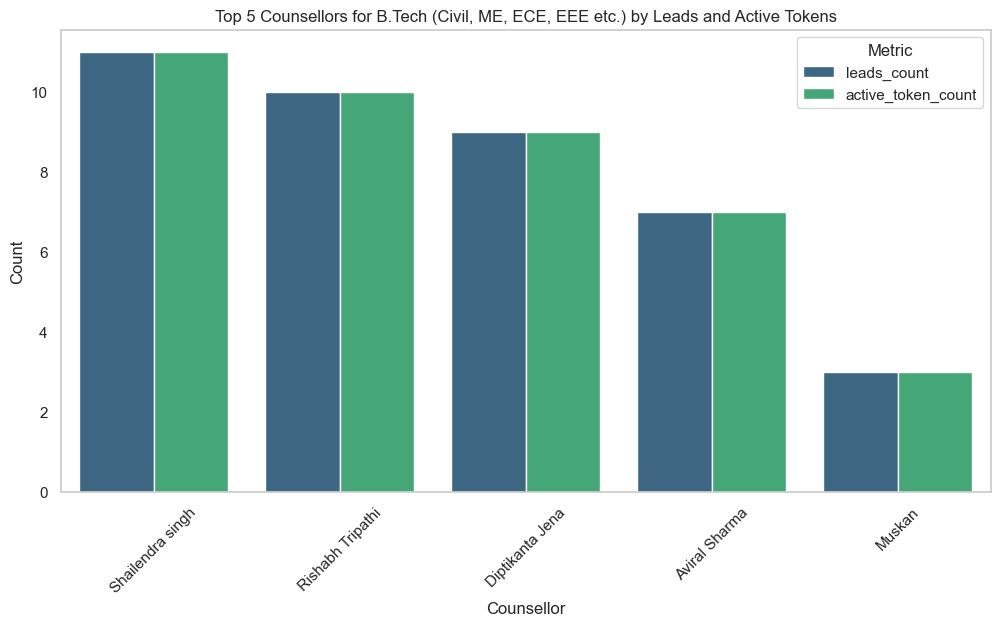

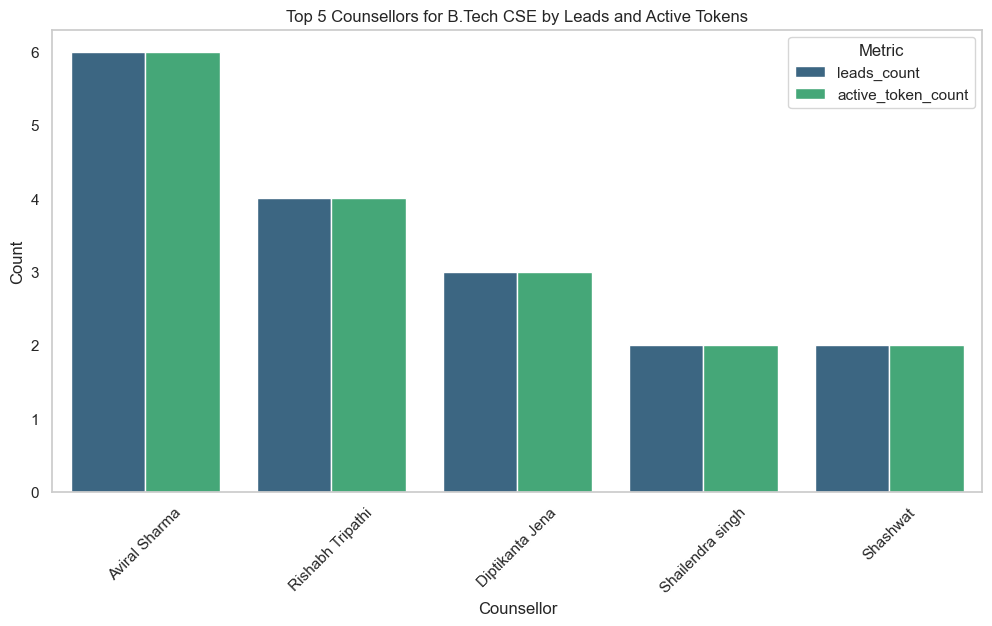

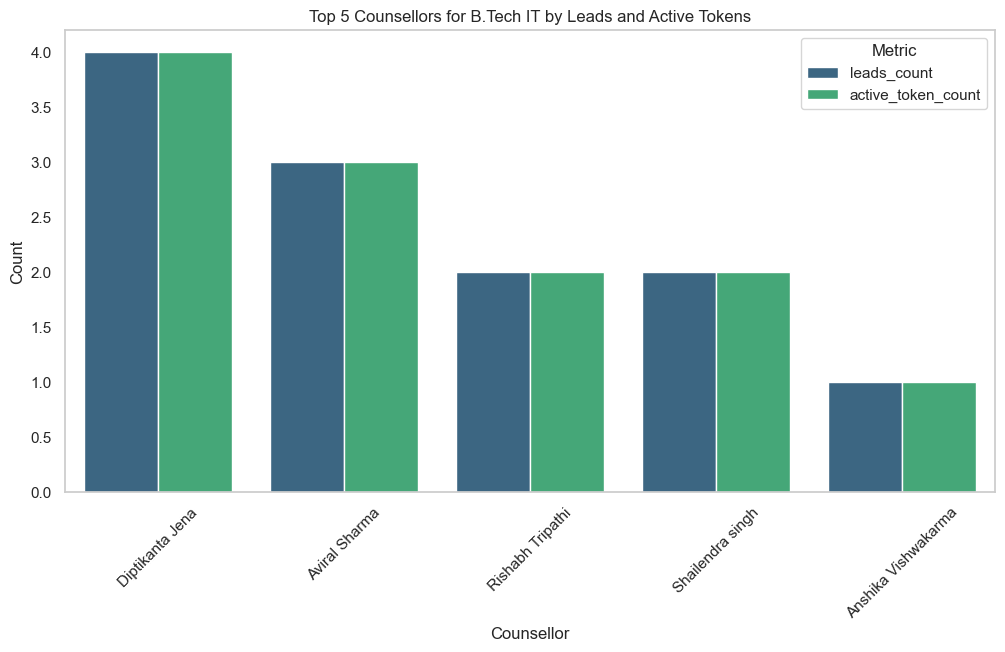

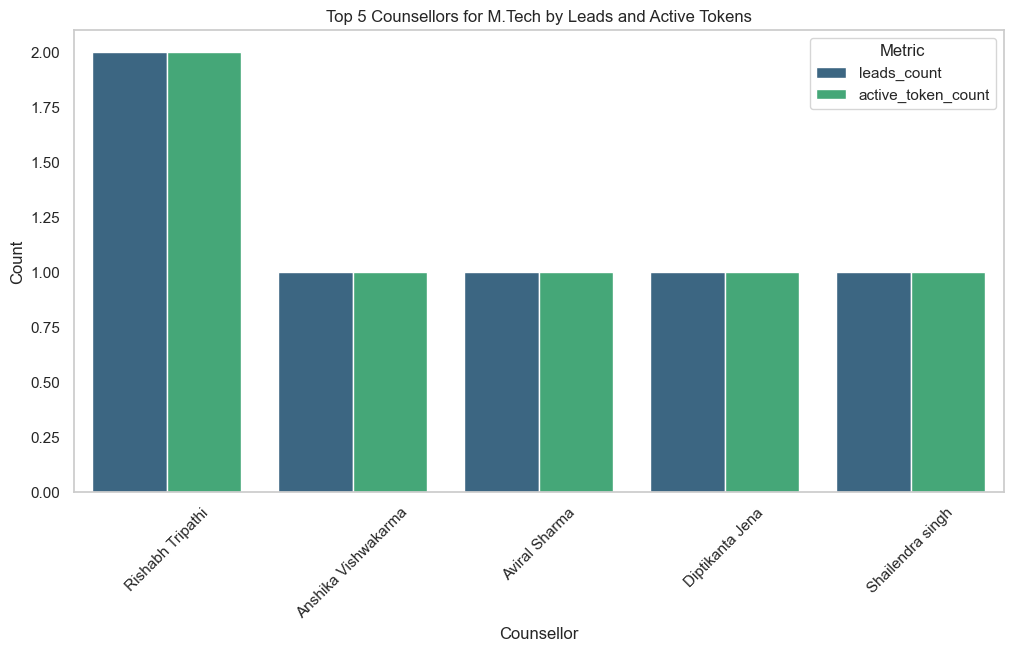

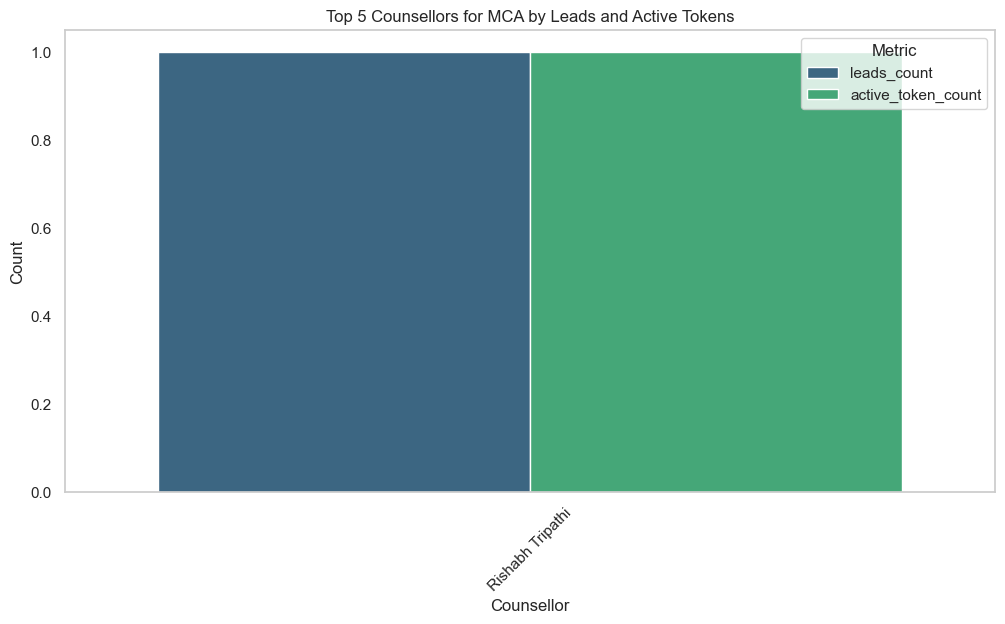

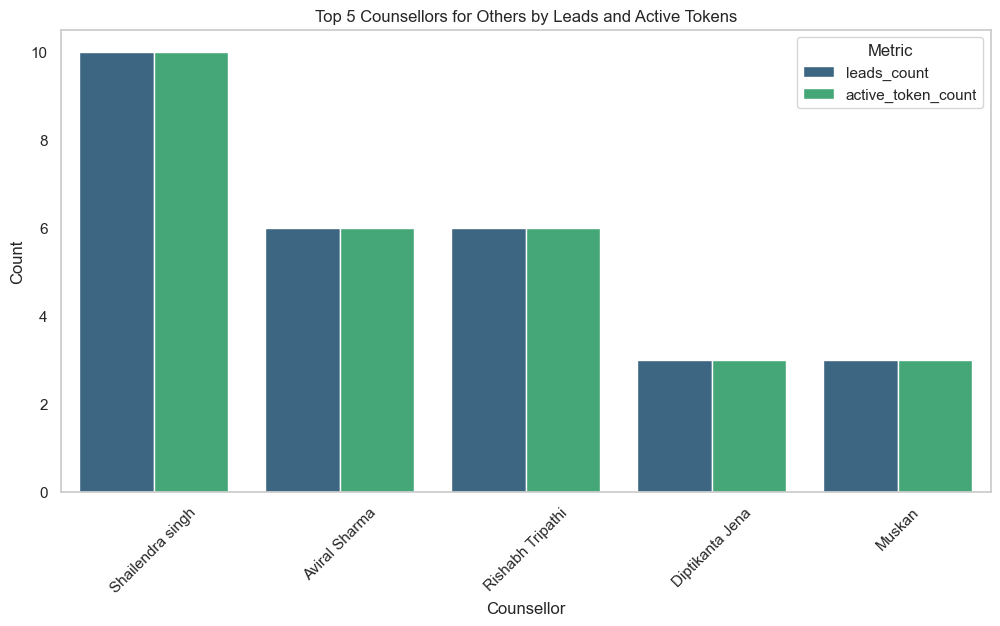

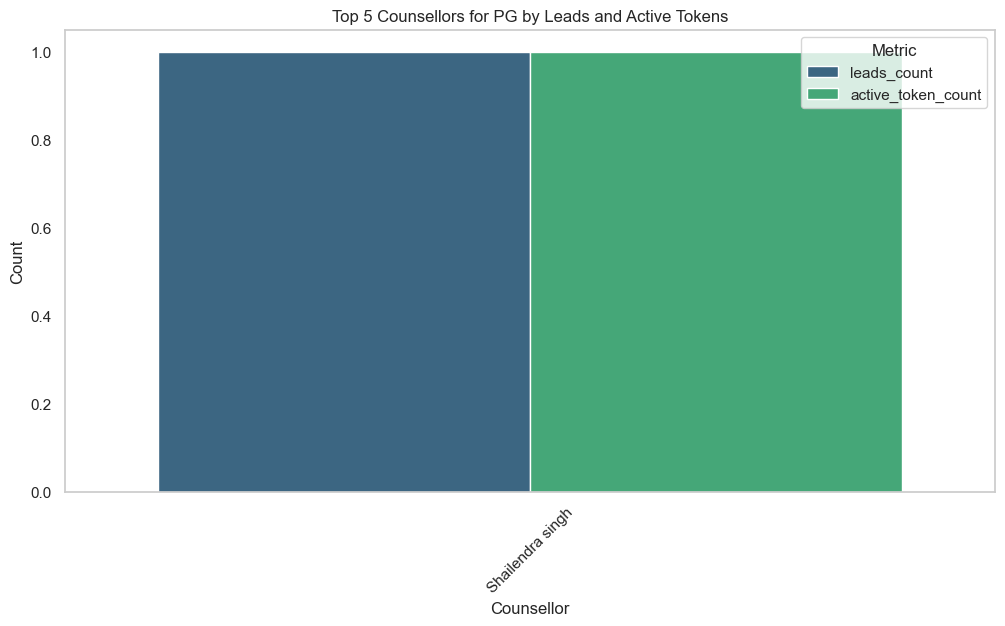

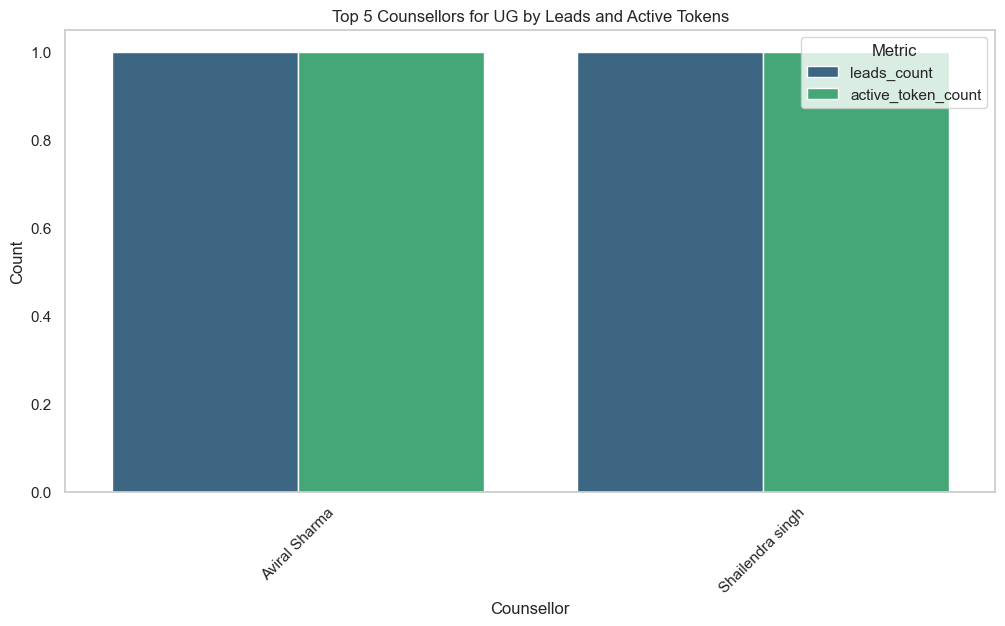

                    graduation_degree           counsellor  leads_count  \
0   B.Tech (Civil, ME, ECE, EEE etc.)     Shailendra singh           11   
1   B.Tech (Civil, ME, ECE, EEE etc.)     Rishabh Tripathi           10   
2   B.Tech (Civil, ME, ECE, EEE etc.)      Diptikanta Jena            9   
3   B.Tech (Civil, ME, ECE, EEE etc.)        Aviral Sharma            7   
4   B.Tech (Civil, ME, ECE, EEE etc.)               Muskan            3   
5                          B.Tech CSE        Aviral Sharma            6   
6                          B.Tech CSE     Rishabh Tripathi            4   
7                          B.Tech CSE      Diptikanta Jena            3   
8                          B.Tech CSE     Shailendra singh            2   
9                          B.Tech CSE             Shashwat            2   
10                          B.Tech IT      Diptikanta Jena            4   
11                          B.Tech IT        Aviral Sharma            3   
12                       

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['created_date'] = pd.to_datetime(df['created_date'])
df['paid_date'] = pd.to_datetime(df['paid_date'])

leads_count_df = df.groupby(['graduation_degree', 'counsellor']).size().reset_index(name='leads_count')

active_tokens_df = df[df['status'] == 'ACTIVE TOKEN']

active_tokens_count_df = active_tokens_df.groupby(['graduation_degree', 'counsellor']).size().reset_index(name='active_token_count')

merged_df = pd.merge(leads_count_df, active_tokens_count_df, on=['graduation_degree', 'counsellor'], how='left').fillna(0)

top_5_counsellors_per_degree = merged_df.groupby('graduation_degree').apply(lambda x: x.nlargest(5, 'leads_count')).reset_index(drop=True)

plt.figure(figsize=(14, 8))

for graduation_degree in top_5_counsellors_per_degree['graduation_degree'].unique():
    degree_df = top_5_counsellors_per_degree[top_5_counsellors_per_degree['graduation_degree'] == graduation_degree]
    
    degree_df_melted = degree_df.melt(id_vars=['graduation_degree', 'counsellor'], value_vars=['leads_count', 'active_token_count'],
                                      var_name='Metric', value_name='Count')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=degree_df_melted, x='counsellor', y='Count', hue='Metric', palette='viridis')
    plt.title(f'Top 5 Counsellors for {graduation_degree} by Leads and Active Tokens')
    plt.xlabel('Counsellor')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(title='Metric')
    plt.show()

print(top_5_counsellors_per_degree)


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df['created_date'] = pd.to_datetime(df['created_date'])
df['paid_date'] = pd.to_datetime(df['paid_date'])
df['upload_timestamp'] = pd.to_datetime(df['upload_timestamp'])

le_counsellor = LabelEncoder()
df['counsellor_encoded'] = le_counsellor.fit_transform(df['counsellor'])

le_cohort = LabelEncoder()
df['cohort_encoded'] = le_cohort.fit_transform(df['cohort'])

features = ['created_date', 'source', 'agent', 'graduation_degree', 'graduation_percentage', 'work_experience', 'contacted']
target = ['counsellor_encoded', 'cohort_encoded']

X = df[features]
y = df[target]
numeric_features = ['graduation_percentage', 'work_experience']
categorical_features = ['source', 'agent', 'graduation_degree']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MultiOutputRegressor(RandomForestRegressor(random_state=42)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_counsellor = le_counsellor.inverse_transform(y_pred[:, 0].astype(int))
y_pred_cohort = le_cohort.inverse_transform(y_pred[:, 1].astype(int))


new_leads = pd.DataFrame({
    'created_date': ['2023-07-01', '2023-08-01'],
    'source': ['S1', 'S2'],
    'agent': ['A1', 'A3'],
    'graduation_degree': ['B.TECH IT', 'BA'],
    'graduation_percentage': [92, 80],
    'work_experience': [5, 1],
    'contacted': [1, 0]
})

new_leads['created_date'] = pd.to_datetime(new_leads['created_date'])
new_leads_predictions = model.predict(new_leads)

new_leads_counsellor = le_counsellor.inverse_transform(new_leads_predictions[:, 0].astype(int))
new_leads_cohort = le_cohort.inverse_transform(new_leads_predictions[:, 1].astype(int))

print("New Leads Counsellor Predictions:", new_leads_counsellor)
print("New Leads Cohort Predictions:", new_leads_cohort)


New Leads Counsellor Predictions: ['Muskan' 'Muskan']
New Leads Cohort Predictions: ['Cohort 2' 'Cohort 2']


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('lead_more detailed.csv')

features = ['platform', 'graduation_degree', 'graduation_percentage', 'work_experience', 'mapped', 'contacted', 'source']
targets = ['agent', 'counsellor']

df[features] = df[features].fillna('Unknown')
df[targets] = df[targets].fillna('Unknown')

X = df[features]
y = df[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['graduation_percentage', 'work_experience']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['platform', 'graduation_degree', 'mapped', 'contacted', 'source'])
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_agent = accuracy_score(y_test['agent'], y_pred[:, 0])
accuracy_counsellor = accuracy_score(y_test['counsellor'], y_pred[:, 1])

print(f"Model Accuracy for Agent: {accuracy_agent:.2f}")
print(f"Model Accuracy for Counsellor: {accuracy_counsellor:.2f}")

def predict_agent_and_counsellor(platform, graduation_degree, graduation_percentage, work_experience, mapped, contacted, source):
    input_data = pd.DataFrame({
        'platform': [platform],
        'graduation_degree': [graduation_degree],
        'graduation_percentage': [graduation_percentage],
        'work_experience': [work_experience],
        'mapped': [mapped],
        'contacted': [contacted],
        'source': [source]
    })
    
    prediction = model.predict(input_data)
    predicted_agent = prediction[0][0]
    predicted_counsellor = prediction[0][1]
    
    return predicted_agent, predicted_counsellor

def user_input():
    platform = input("Enter the platform (e.g., Facebook, LinkedIn, etc.): ")
    graduation_degree = input("Enter the graduation degree (e.g., Bachelors, Masters, Others): ")
    graduation_percentage = float(input("Enter the graduation percentage (e.g., 70): "))
    work_experience = float(input("Enter the work experience in years (e.g., 6): "))
    mapped = input("Enter the mapping status (e.g., Mapped, Not Mapped): ")
    contacted = input("Enter the contacted status (e.g., Contacted, Not Contacted): ")
    source = input("Enter the source (e.g., Facebook, LinkedIn, etc.): ")

    return platform, graduation_degree, graduation_percentage, work_experience, mapped, contacted, source

if __name__ == "__main__":
    platform, graduation_degree, graduation_percentage, work_experience, mapped, contacted, source = user_input()
    
    predicted_agent, predicted_counsellor = predict_agent_and_counsellor(
        platform, graduation_degree, graduation_percentage, work_experience, mapped, contacted, source
    )
    
    print(f'The predicted agent is: {predicted_agent}')
    print(f'The predicted counsellor is: {predicted_counsellor}')





Model Accuracy for Agent: 0.94
Model Accuracy for Counsellor: 0.95
The predicted agent is: Bompada Sai Sudeep
The predicted counsellor is: Shailendra singh


In [62]:
for _ in range(5):
    sample = X_test.sample(n=1)
    pred_agent, pred_counsellor = predict_agent_and_counsellor(
        sample['platform'].values[0],
        sample['graduation_degree'].values[0],
        sample['graduation_percentage'].values[0],
        sample['work_experience'].values[0],
        sample['mapped'].values[0],
        sample['contacted'].values[0],
        sample['source'].values[0]
    )
    print(f"Input: {sample.to_dict('records')[0]}")
    print(f"Predicted Agent: {pred_agent}")
    print(f"Predicted Counsellor: {pred_counsellor}")
    print(f"Actual Agent: {y_test.loc[sample.index, 'agent'].values[0]}")
    print(f"Actual Counsellor: {y_test.loc[sample.index, 'counsellor'].values[0]}")

Input: {'platform': 'Facebook', 'graduation_degree': 'B.Tech (Civil, ME, ECE, EEE etc.)', 'graduation_percentage': 60, 'work_experience': 0, 'mapped': 'Mapped', 'contacted': 'Contacted', 'source': 'Facebook'}
Predicted Agent: Rohini Rao Dhara
Predicted Counsellor: Shailendra singh
Actual Agent: Rohini Rao Dhara
Actual Counsellor: Shailendra singh
Input: {'platform': 'Facebook', 'graduation_degree': 'Others', 'graduation_percentage': 75, 'work_experience': 7, 'mapped': 'Mapped', 'contacted': 'Contacted', 'source': 'Zoom Webinar'}
Predicted Agent: Bompada Sai Sudeep
Predicted Counsellor: Muskan
Actual Agent: Bompada Sai Sudeep
Actual Counsellor: Muskan
Input: {'platform': 'Facebook', 'graduation_degree': 'B.Tech CSE', 'graduation_percentage': 80, 'work_experience': 9, 'mapped': 'Mapped', 'contacted': 'Contacted', 'source': 'Facebook'}
Predicted Agent: Chitwan Soni
Predicted Counsellor: Aviral Sharma
Actual Agent: Chitwan Soni
Actual Counsellor: Aviral Sharma
Input: {'platform': 'Facebook